если ругается на не установленные библиотеки:

pip install pandas
pip install matplotlib
pip install plotly
pip install seaborn
pip install scikit-learn
pip install --upgrade nbformat

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as plx
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc


path = "16k_Movies.csv"
df = pd.read_csv(path)
df.head()


Unnamed: 0                     Title  Release Date  \
0           0            Dekalog (1988)  Mar 22, 1996   
1           1         Three Colors: Red  Nov 23, 1994   
2           2            The Conformist  Oct 22, 1970   
3           3               Tokyo Story  Mar 13, 1972   
4           4  The Leopard (re-release)  Aug 13, 2004   

                                         Description  Rating  \
0  This masterwork by Krzysztof Kieślowski is one...     7.4   
1  Krzysztof Kieslowski closes his Three Colors t...     8.3   
2  Set in Rome in the 1930s, this re-release of B...     7.3   
3  Yasujiro Ozu’s Tokyo Story follows an aging co...     8.1   
4  Set in Sicily in 1860, Luchino Visconti's spec...     7.8   

  No of Persons Voted           Directed by  \
0                 118  Krzysztof Kieslowski   
1                 241  Krzysztof Kieslowski   
2                 106   Bernardo Bertolucci   
3                 147          Yasujirô Ozu   
4                  85      Luchino Visconti   

                                          Written by  Duration  \
0         Krzysztof Kieslowski, Krzysztof Piesiewicz  9 h 32 m   
1  Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...  1 h 39 m   
2               Alberto Moravia, Bernardo Bertolucci  1 h 47 m   
3                            Kôgo Noda, Yasujirô Ozu  2 h 16 m   
4  Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...   3 h 7 m   

                  Genres  
0                  Drama  
1  Drama,Mystery,Romance  
2                  Drama  
3                  Drama  
4          Drama,History

In [45]:
df.shape

(16290, 10)

In [46]:
#Удалим первый столбец без имени
df.drop(columns = 'Unnamed: 0', inplace=True)

print()
# покажет информацию о размерности данных и как данные индексируются, количество not-a-number элементов
print('Размерность, нумерация и не числовые значения набора данных (df.info()):\n',df.info()) 

print()
# показывает статистики: count,mean, std, min, 25%-50%-75% percentile, max
print('Статистики набора данных (df.describe()):\n',df.describe()) 

print()
# количество уникальных значений для каждого столбца.
print('Количество уникальных значений для каждого столбца (df.nunique()):\n', df.nunique()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                16290 non-null  object 
 1   Release Date         16290 non-null  object 
 2   Description          16290 non-null  object 
 3   Rating               12846 non-null  float64
 4   No of Persons Voted  12829 non-null  object 
 5   Directed by          16283 non-null  object 
 6   Written by           15327 non-null  object 
 7   Duration             16277 non-null  object 
 8   Genres               16285 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB
Размерность, нумерация и не числовые значения набора данных (df.info()):
 None

Статистики набора данных (df.describe()):
              Rating
count  12846.000000
mean       6.617632
std        1.415272
min        0.300000
25%        5.800000
50%        6.800000
75%        7.600000
max   

In [47]:
# Проверим на пустые значения и посчитаем их для каждого столбца
df.isna().sum()

Title                     0
Release Date              0
Description               0
Rating                 3444
No of Persons Voted    3461
Directed by               7
Written by              963
Duration                 13
Genres                    5
dtype: int64

In [48]:
# Удаление пустых значений
df.dropna(inplace=True)
df.isna().sum()


Title                  0
Release Date           0
Description            0
Rating                 0
No of Persons Voted    0
Directed by            0
Written by             0
Duration               0
Genres                 0
dtype: int64

In [49]:
columns_for_figs = list(df.columns)
for col in columns_for_figs:
    if col!='Rating':
        fig = plx.histogram(df,x=col,title = col)
        fig.show()

In [50]:
import re


def convert_to_minutes(duration):
    if isinstance(duration, str):  # Проверяем, что значение строка
        # Ищем часы и минуты в строке
        match = re.match(r'(?:(\d+)\s*h)?\s*(?:(\d+)\s*m)?', duration)
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            total_minutes = hours * 60 + minutes
            return total_minutes if total_minutes > 0 else None  # Возвращаем None, если 0 минут
    return None  # Возвращаем None для значений, которые не являются строками

# Применим функцию к столбцу Duration
df['Duration'] = df['Duration'].apply(convert_to_minutes)

# Проверим результат
print("Первые строки после преобразования в минуты:\n", df['Duration'].head())

# Проверим, есть ли пропущенные значения после преобразования
print("Количество NaN значений в столбце 'Duration':", df['Duration'].isna().sum())

# Удалим строки с NaN, если они присутствуют
df = df.dropna(subset=['Duration'])

# Убедимся, что теперь столбец содержит только числовые значения в минутах
print("Тип данных столбца 'Duration':", df['Duration'].dtype)

Первые строки после преобразования в минуты:
 0    572.0
1     99.0
2    107.0
3    136.0
4    187.0
Name: Duration, dtype: float64
Количество NaN значений в столбце 'Duration': 61
Тип данных столбца 'Duration': float64


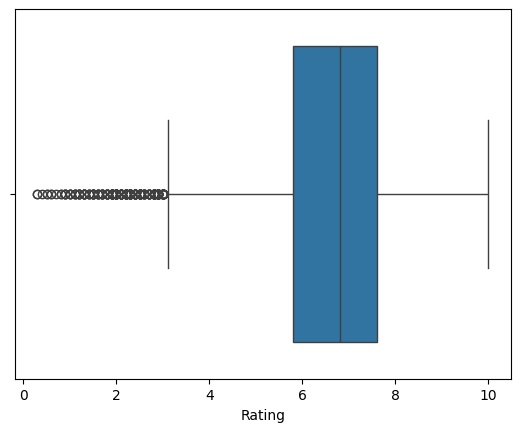

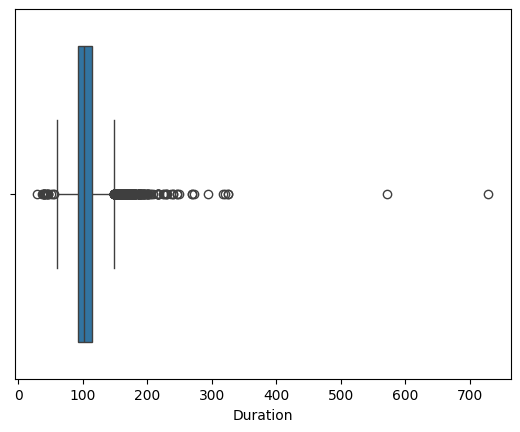

In [51]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for column in num_cols:
    sns.boxplot(data=df, x=column)
    plt.show()

In [1]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_copy, x='Rating', y='Number of Persons Voted', alpha=0.7)
plt.xlabel('Рейтинг фильма')
plt.ylabel('Количество голосов')
plt.title('Зависимость количества голосов от рейтинга фильма')
plt.show()

NameError: name 'plt' is not defined

In [52]:
# Создаем копию датасета 
df_copy = df.loc[:, df.columns != 'Description'].copy()
label_encoder = LabelEncoder()
categorical_columns = ['Title', 'Release Date', 'Rating', 'No of Persons Voted', 'Directed by', 'Written by', 'Duration', 'Genres']
for col in categorical_columns:
    df_copy[col] = label_encoder.fit_transform(df[col])
df_copy.head()

Title  Release Date  Rating  No of Persons Voted  Directed by  Written by  \
0   2295          2071      71                  177         2895        5230   
1  10048          2652      80                  353         2895        5231   
2   8259          2902      70                  164          516         210   
3  10123          1981      78                  209         5104        5256   
4   9018           304      75                  903         3066        3133   

   Duration  Genres  
0       170    1260  
1        47    1371  
2        55    1260  
3        84    1260  
4       134    1311

In [53]:
correlation_matrix = df_copy.corr()
print(correlation_matrix)

                        Title  Release Date    Rating  No of Persons Voted  \
Title                1.000000     -0.017235  0.004717            -0.008298   
Release Date        -0.017235      1.000000  0.003057             0.000055   
Rating               0.004717      0.003057  1.000000            -0.035059   
No of Persons Voted -0.008298      0.000055 -0.035059             1.000000   
Directed by          0.005537     -0.007571  0.006434             0.012998   
Written by           0.003091     -0.007440 -0.000017             0.018418   
Duration             0.006822      0.008605  0.163870            -0.013513   
Genres              -0.006439      0.028056  0.001845             0.016495   

                     Directed by  Written by  Duration    Genres  
Title                   0.005537    0.003091  0.006822 -0.006439  
Release Date           -0.007571   -0.007440  0.008605  0.028056  
Rating                  0.006434   -0.000017  0.163870  0.001845  
No of Persons Voted     0.012

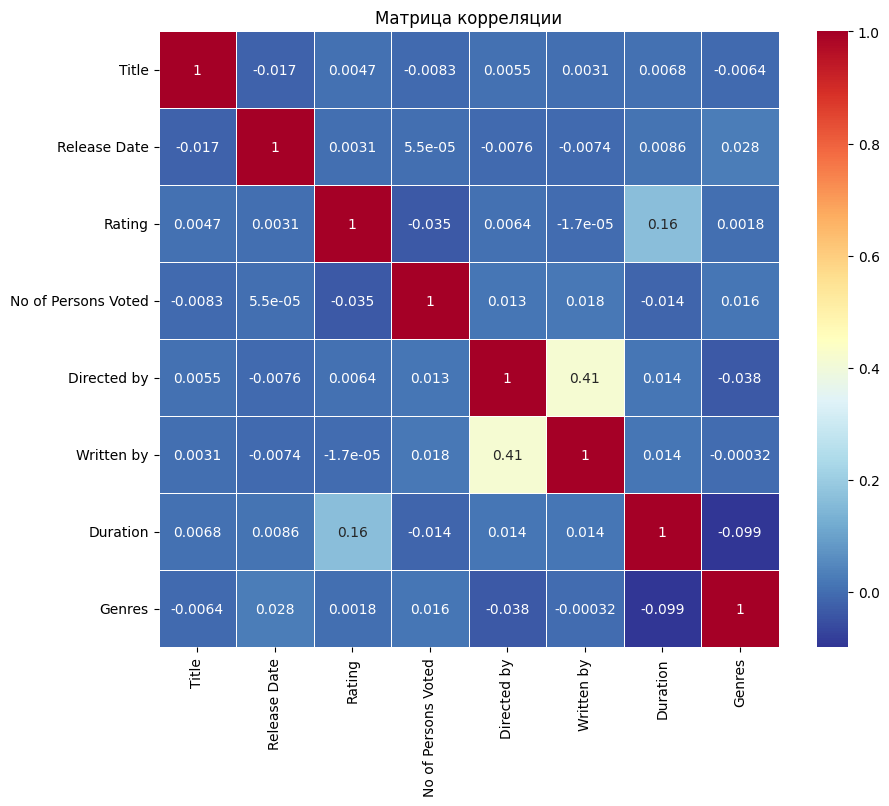

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap="RdYlBu_r")
plt.title('Матрица корреляции')
plt.show()


In [55]:
print(df_copy.columns)


Index(['Title', 'Release Date', 'Rating', 'No of Persons Voted', 'Directed by',
       'Written by', 'Duration', 'Genres'],
      dtype='object')


Логистическая регрессия - Accuracy: 0.549491
Логистическая регрессия - ROC-AUC: 0.575825


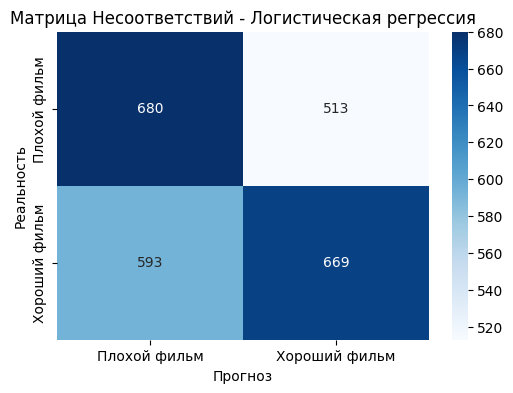

In [89]:
from sklearn.preprocessing import StandardScaler
# Создание целевой переменной
df_copy['Good_Movie'] = (df_copy['Rating'] > 64).astype(int)

X = df_copy.drop(['Rating', 'Good_Movie'], axis=1)  # Измените имена, если нужно
y = df_copy['Good_Movie']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание классификатора логистической регрессии
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

y_pred_lr = logistic_regression.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Логистическая регрессия - Accuracy: {accuracy:.6f}')

# ROC-AUC
if len(set(y_test)) > 1:
    roc_auc_lr = roc_auc_score(y_test, logistic_regression.predict_proba(X_test_scaled)[:, 1])
    print(f'Логистическая регрессия - ROC-AUC: {roc_auc_lr:.6f}')
else:
    print('В тестовой выборке присутствует только один класс, ROC-AUC не может быть рассчитан.')

# Вывод матрицы несоответствий
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Плохой фильм', 'Хороший фильм'], yticklabels=['Плохой фильм', 'Хороший фильм'])
plt.xlabel('Прогноз')
plt.ylabel('Реальность')
plt.title('Матрица Несоответствий - Логистическая регрессия')
plt.show()


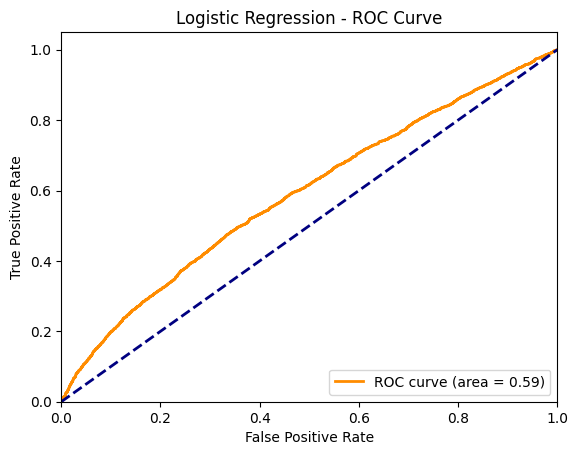

In [88]:


# ROC Curve
y_scores_lr = logistic_regression.predict_proba(X_train_scaled)[:, 1]  
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)
auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.show()